In [26]:
import scipy.constants as SI
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import RK4 as RK

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
#SI.constants
Energy = 50
Ee = Energy * 1e9*SI.e
e = SI.e
me = SI.m_e
re = SI.physical_constants['classical electron radius'][0]

#Plasma parameters
n0 = 2e21 #m⁻³
L_plasma = 11 #m

wp = np.sqrt(n0*e**2/me/SI.epsilon_0)
kp = wp/SI.c
E0 = me*SI.c*wp/e
Ez = 3.2e9 #V/m
tau_r = 2*re/3/SI.c

K = kp/ np.sqrt(2)
A = tau_r * SI.c**2 * K**2
B = SI.c**2 * K**2
C = wp*Ez/E0
D = tau_r * SI.c**2 * K**4

#Initial gamma
gamma0 = Ee/me/(SI.c**2)

#Beam parameters
beta_matched = np.sqrt(2*gamma0)/kp
lambda_beta = 2*np.pi*beta_matched

k_beta = 2*np.pi/lambda_beta
emittance_norm = 10e-6 # m rad

sig_x = np.sqrt(beta_matched*emittance_norm/gamma0)

sig_xp = np.sqrt(1/beta_matched * emittance_norm/gamma0)
z0 = 0 # m
#For saving figures
actual = 'actual'
directory = f'd_gamma_{actual}_500GeV/'
save = False

In [28]:
n_per_beta = 500
n = round(L_plasma/lambda_beta * n_per_beta)
z, dz = np.linspace(0,L_plasma,n, retstep = True)

In [42]:
x0 = 1e-7 # m
y0 = 0 # m
z0 = 0 # m
x_dot0 = 0 # m/s
y_dot0 = 0 # m/s
sysinit2d = np.array([x0, x_dot0, y0, y_dot0, gamma0])

t, sol = RK.integrator(z, sysinit2d, n0)
x = sol[0,:]
y = sol[2,:]
E = sol[4,:]*SI.m_e*SI.c**2 /SI.e / 1e9

0 % 
 0.09999210324915883
5 % 
 -0.05646187044276564
10 % 
 -0.016838413909126895
15 % 
 0.06883816759867295
20 % 
 -0.0914057371872558
25 % 
 0.09597448148204735
30 % 
 -0.094581401614756
35 % 
 0.09366917510026881
40 % 
 -0.09394112391120141
45 % 
 0.09127263382205392
50 % 
 -0.07787052185528089
55 % 
 0.04551975051494067
60 % 
 0.006966408161127435
65 % 
 -0.06385297312107123
70 % 
 0.09045644498115049
75 % 
 -0.05444962903632556
80 % 
 -0.031054613661195156
85 % 
 0.08832401372356805
90 % 
 -0.04219227583070886
95 % 
 -0.06196312534767705


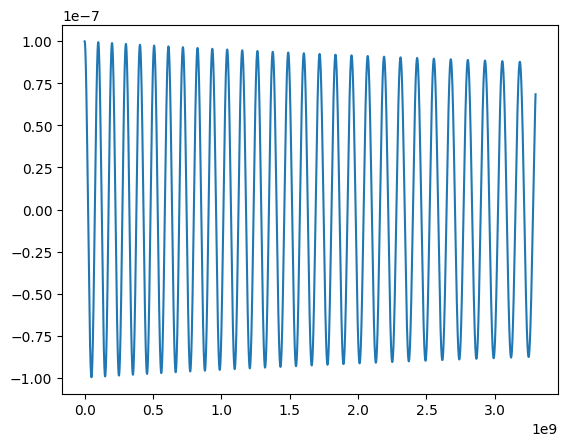

In [43]:
plt.plot(t*SI.c, x)

In [81]:
x = np.array([0,1,2,3,4])
z = np.array([5, 6, 7, 8, 9])
p = np.array([0,2])
y = np.c_[x[:],z]
print(min(x))
for col in y:
    print(col)

0
[0 5]
[1 6]
[2 7]
[3 8]
[4 9]


In [80]:
print(y**2)

[[ 0 25]
 [ 1 36]
 [ 4 49]
 [ 9 64]
 [16 81]]
